In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


In [2]:
# Loading data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
# Exploring the data
print('Training data: {} and {}'.format(X_train.shape, Y_train.shape))
print('Testing data: {} and {}'.format(X_test.shape, Y_test.shape))

Training data: (50000, 32, 32, 3) and (50000, 1)
Testing data: (10000, 32, 32, 3) and (10000, 1)


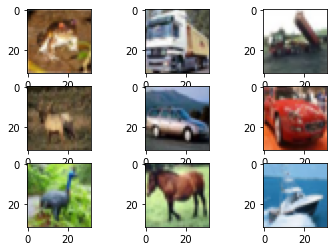

In [4]:
# Images
for i in range(9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)

plt.show()

In [5]:
np.random.seed(6)

In [6]:
# Preprocessing: Normalizing data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [7]:
# One-hot-Encoding
print('Class: {}'.format(Y_train[0]))

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

n_class = Y_test.shape[1]

print('Corresponding Vector: {}'.format(Y_train[0]))
print('Total Categories: {}'.format(n_class))

Class: [6]
Corresponding Vector: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Total Categories: 10


### The All-CNN network used for classification on CIFAR-10.
Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU
* global averaging over 6 × 6 spatial dimensions
* 10 or 100-way softmax

In [8]:
# Making of the All-CNN
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, GlobalAveragePooling2D, Activation
from keras.optimizers import SGD  # Stochastic Gradient Descent for optimization

In [9]:
# The All - CNN
def allcnn(weights = None):
    
    # Model type
    model = Sequential()
    
    # Adding layers
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape = (32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5)) # Selects neurons at random and disables them, to prevent overfitting to certain cases
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # Adding pre-trained weights, if present
    if weights:
        model.load_weights(weights)
    
    return model

In [10]:
# Hyper-parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# Optimizer
sgd = SGD(lr = learning_rate, decay = weight_decay, momentum = momentum, nesterov = True)

# Compiling All-CNN
model = allcnn()
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

# Model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)      

In [11]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [12]:
# Training parameters
epochs = 350
batch_size = 32

# Fit and train the model
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/350
50000/50000 [==============================] - 26s 520us/step - loss: 1.9975 - accuracy: 0.2432 - val_loss: 1.6731 - val_accuracy: 0.3760
Epoch 2/350
50000/50000 [==============================] - 20s 392us/step - loss: 1.5148 - accuracy: 0.4400 - val_loss: 1.3239 - val_accuracy: 0.5233
Epoch 3/350
50000/50000 [==============================] - 19s 389us/step - loss: 1.2231 - accuracy: 0.5583 - val_loss: 1.1133 - val_accuracy: 0.6003
Epoch 4/350
50000/50000 [==============================] - 20s 393us/step - loss: 1.0278 - accuracy: 0.6348 - val_loss: 1.0212 - val_accuracy: 0.6427
Epoch 5/350
50000/50000 [==============================] - 20s 392us/step - loss: 0.9002 - accuracy: 0.6799 - val_loss: 0.8159 - val_accuracy: 0.7133
Epoch 6/350
50000/50000 [==============================] - 20s 390us/step - loss: 0.8076 - accuracy: 0.7155 - val_loss: 0.7853 - val_accuracy: 0.7225
Epoch 7/350
50000/50000 [=========================

In [15]:
# Using pre-trained weights
pre_weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
pre_model = allcnn(pre_weights)

#Compiling model
pre_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

In [16]:
# Pre-trained model preformance
print(pre_model.summary())

# Testing the pre-trained model
scores = pre_model.evaluate(X_test, Y_test, verbose = 1)
print('Pre-trained model accuracy: {}'.format(scores[1]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 192)      

In [17]:
# Dictionary with class labels and names
labels = range(0, 10)
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_labels = dict(zip(labels, names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


## Results on Pre-trained model

In [18]:
# Testing pre-trained model on images
batch = X_test[1083:1092]
labels = np.argmax(Y_test[1083:1092], axis = -1)

# Finding predictions
pre_predictions = pre_model.predict(batch, verbose = 1)
print('Predictions: {}'.format(pre_predictions))

# Find class labels corresponding to predictions
pre_predictions = np.argmax(pre_predictions, axis = -1)
print('Labels corresponding to predictions: {}'.format(pre_predictions))

9/9 [==============================] - 0s 8ms/step
Predictions: [[3.55661524e-17 1.42007373e-21 1.00000000e+00 3.93384547e-15
  5.67820617e-11 3.42716942e-16 2.38035611e-12 1.94800485e-14
  2.15398685e-19 1.82648879e-20]
 [6.71853981e-19 8.65094214e-24 1.54537191e-15 1.42868217e-11
  5.30751407e-17 1.00000000e+00 8.33017093e-16 5.47122900e-18
  1.15419644e-18 1.24518460e-23]
 [3.67147199e-16 3.76014270e-17 6.83558028e-14 7.83990836e-05
  9.93375719e-01 6.54592365e-03 1.06676079e-09 1.41339624e-08
  1.21644428e-17 3.97103445e-16]
 [0.00000000e+00 0.00000000e+00 1.85031407e-32 9.81376693e-31
  1.00000000e+00 4.49446999e-26 6.69969963e-35 2.11213906e-27
  0.00000000e+00 0.00000000e+00]
 [4.96476715e-17 6.70270075e-17 7.80496815e-14 6.62647411e-12
  3.09776120e-12 7.36325402e-15 1.00000000e+00 1.83513774e-17
  6.42360495e-19 1.01034083e-16]
 [7.31156524e-19 1.43361519e-13 6.67969603e-18 2.59880733e-04
  2.43954108e-13 9.99740064e-01 3.56328985e-12 1.08096399e-12
  3.28698348e-17 4.40581091

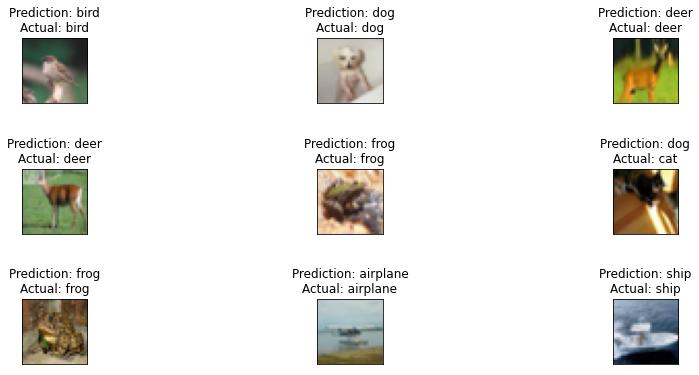

In [19]:
# Plot the results for pre-trained model
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    title = 'Prediction: {}\nActual: {}'.format(class_labels[pre_predictions[i]], class_labels[labels[i]])
    axs[i].set_title(title)
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
    
plt.show()

## Results on Trained model

In [26]:
# Testing the trained model
scores = model.evaluate(X_test, Y_test, verbose = 1)
print('Trained model accuracy: {}'.format(scores[1]))

10000/10000 [==============================] - 1s 148us/step
Trained model accuracy: 0.8174999952316284


In [20]:
# Finding predictions
predictions = model.predict(batch, verbose = 1)
print('Predictions: {}'.format(predictions))

# Find class labels corresponding to predictions
predictions = np.argmax(predictions, axis = -1)
print('Labels corresponding to predictions: {}'.format(predictions))

9/9 [==============================] - 0s 4ms/step
Predictions: [[3.65369132e-23 1.09334911e-36 1.00000000e+00 4.49101511e-23
  1.74989606e-20 3.44233176e-22 9.50635451e-23 4.20671615e-25
  2.04902630e-31 3.35329894e-32]
 [8.49218320e-20 3.16934871e-23 1.27849456e-12 2.70475374e-14
  9.59132795e-17 1.00000000e+00 2.75326067e-13 7.39240328e-17
  3.81670408e-20 2.68787977e-18]
 [1.04303260e-16 9.33194557e-23 1.23920691e-11 3.30900491e-07
  9.99999642e-01 5.74003275e-11 1.38227022e-13 1.88748928e-08
  1.54203800e-23 1.11497323e-20]
 [0.00000000e+00 0.00000000e+00 7.82478930e-30 1.09431068e-25
  1.00000000e+00 6.85036491e-21 3.05565962e-25 5.75145546e-18
  0.00000000e+00 1.66683829e-31]
 [2.51042140e-18 1.45428266e-13 1.70134306e-11 2.56586152e-09
  9.42243950e-10 2.50359087e-12 1.00000000e+00 1.19323464e-12
  2.63707826e-18 8.14620914e-16]
 [2.91678591e-11 3.40279257e-14 4.80008438e-12 9.99990344e-01
  6.02500677e-07 7.85354678e-06 2.86603311e-11 1.23171685e-06
  2.57076538e-16 6.01901584

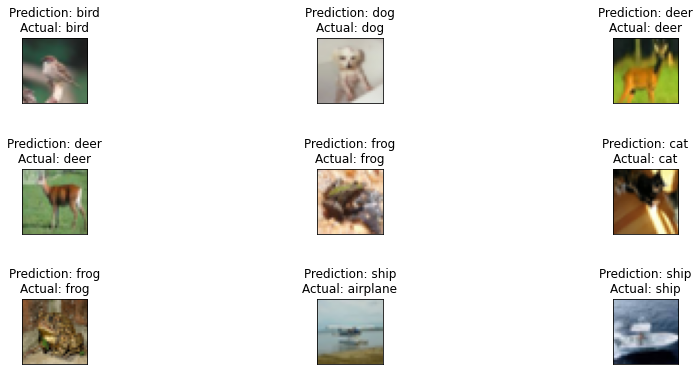

In [21]:
# Plot the results for trained model
fig, axs = plt.subplots(3, 3, figsize = (15 ,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    title = 'Prediction: {}\nActual: {}'.format(class_labels[predictions[i]], class_labels[labels[i]])
    axs[i].set_title(title)
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
    
plt.show()

In [25]:
model.save('my_model.h5')